<a href="https://colab.research.google.com/github/tuantran221/intro-Machine-Learning/blob/main/Cluster_Analysis_in_Python/Cluster_Analysis_in_Python_Chapter%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis in Python
**Chapter 4: Clustering in Real World**




In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

#Extract RGB values from image 
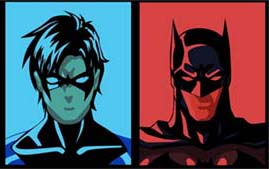

In [5]:
import matplotlib.image as img

batman_image = img.imread('batman.jpg')
print(batman_image.shape)

r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


Read batman.csv file 

In [11]:
batman_df =  pd.read_csv('https://raw.githubusercontent.com/ozlerhakan/datacamp/master/Cluster%20Analysis%20in%20Python/batman_df.csv')

batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,10,15,9,0.134338,0.179734,0.126269
1,14,49,36,0.188074,0.587133,0.505076
2,55,125,103,0.738862,1.497787,1.445077
3,35,129,98,0.470185,1.545716,1.374928
4,38,134,101,0.510486,1.605628,1.417017


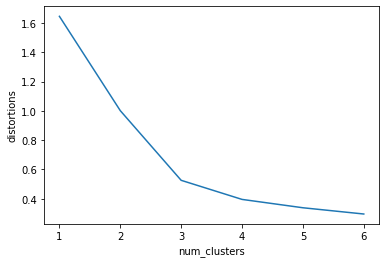

In [19]:

from scipy.cluster.vq import kmeans
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Display dominant colors

In [48]:

cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

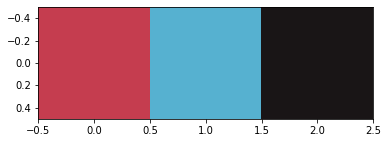

In [49]:

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

#TF-IDF of movie plots

In [22]:
# read movies_plot.csv file 
plots = pd.read_csv('movies_plot.csv')
plots.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [23]:
plots 

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...
...,...,...
995,Unknown Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
996,Boss Nigger,"Upon finding a wagon under attack by bandits, ..."
997,Secret Command,The plot involves a U.S. effort to root out Na...
998,The Monolith Monsters,"In the desert outside of San Angelo, Californi..."


In [24]:
stop_words2= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'dont',
 'should',
 'shouldve',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'arent',
 'couldn',
 'couldnt',
 'didn',
 'didnt',
 'doesn',
 'doesnt',
 'hadn',
 'hadnt',
 'hasn',
 'hasnt',
 'haven',
 'havent',
 'isn',
 'isnt',
 'ma',
 'mightn',
 'mightnt',
 'mustn',
 'mustnt',
 'needn',
 'neednt',
 'shan',
 'shant',
 'shouldn',
 'shouldnt',
 'wasn',
 'wasnt',
 'weren',
 'werent',
 'won',
 'wont',
 'wouldn',
 'wouldnt']

In [32]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
# to remove noise data
def remove_noise(text, stop_words = stop_words2):

    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:

        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())

    return cleaned_tokens

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=remove_noise, max_df=.75, min_df=0.1, max_features=50)

tfidf_matrix = tfidf_vectorizer.fit_transform(plots.Plot.values)

#Top terms in movie clusters

In [34]:
num_clusters = 2

cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['film', 'life', 'new']
['one', 'back', 'two']


#Basic checks on clusters

In [64]:
fifa = pd.read_csv("fifa_18_sample_data.csv")
# fifa.head()
fifa.shape

(1000, 185)

In [ ]:

# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

In [66]:


# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

KeyError: ignored

In [59]:
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

In [60]:

scaled_features = ['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

In [61]:
# import whiten from scipy.cluster.vd
from scipy.cluster.vq import whiten

fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_pac'] = whiten(fifa['pac'])

KeyError: ignored